5.1 Dissolving and Aggregating Data
Let's revisit the dataset from last week, the Justice Equity Need Index (JENI) identifies ZIP Codes in greatest need of public investments in community healing, health, and prevention to help reverse historical injustices. You can access this dataset by navigating to data/Justice_Equity_Need_Index.geojson

Let's start doing some spatial analysis.

Load the JENI dataset and view the first few rows. You will notice a column sup_dist which designates the district number associated with each zip code block. Dissolve by the districts column and use and aggregation function to find the mean jenipctl.
Create a map that displays the dissolved dataframe with a lengend showing the districts and the mean jenipctl
Write a meaningful caption of the map you have created. Refer back to last week's homework for additional information on what exactly the jenipctl means.

In [2]:
# Import libraries
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
from matplotlib.colors import ListedColormap
import seaborn as sns
from shapely.geometry import box
import geopandas as gpd

# Adjust plot font sizes
sns.set(font_scale=1.5)
sns.set_style("white")

In [3]:
path_os = os.path.join("C:/Users/armen/Desktop/CIVL698")

In [4]:
fp = "data/Justice_Equity_Need_Index.geojson"
data = gpd.read_file(fp)

In [5]:
data.head()

,OBJECTID,zip,jenicategory,jenipctl,jenirank,riskcategory,riskpctl,driverscategory,driverspctl,systemcategory,systempctl,neighborhood,sup_dist,spa,csa,SHAPE_Length,SHAPE_Area,geometry
0,1,91108,Lowest,0.0,277,Lowest,0.4,Lowest,0.7,Lowest,3.3,San Marino,District 5,SPA 3 - San Gabriel,City of San Marino,0.177419,0.000962,"MULTIPOLYGON (((-118.10864 34.13733, -118.1084..."
1,2,90631,Lowest,0.4,276,Lowest,2.9,Lowest,1.8,Lowest,0.7,La Habra Heights,District 4,SPA 7 - East,City of La Habra Heights,0.234952,0.001614,"MULTIPOLYGON (((-117.94274 33.97488, -117.9427..."
2,3,90274,Lowest,0.7,275,Lowest,3.6,Lowest,0.0,Lowest,7.2,Palos Verdes Estates,District 4,SPA 8 - South Bay,City of Rancho Palos Verdes,0.563332,0.003029,"MULTIPOLYGON (((-118.39057 33.80426, -118.3905..."
3,4,91361,Lowest,1.1,274,Lowest,12.2,Lowest,0.4,Lowest,5.1,Westlake Village,District 3,SPA 2 - San Fernando,City of Westlake Village,0.197748,0.001336,"MULTIPOLYGON (((-118.80028 34.14798, -118.7995..."
4,5,90275,Lowest,1.4,273,Lowest,6.8,Lowest,3.6,Lowest,6.2,Rancho Palos Verdes,District 4,SPA 8 - South Bay,City of Rancho Palos Verdes,0.624171,0.003365,"MULTIPOLYGON (((-118.39313 33.73857, -118.3931..."


In [6]:
# Then summarize the quantative columns by 'sum'
district_agg = data.dissolve(by='sup_dist')
district_agg

,geometry,OBJECTID,zip,jenicategory,jenipctl,jenirank,riskcategory,riskpctl,driverscategory,driverspctl,systemcategory,systempctl,neighborhood,spa,csa,SHAPE_Length,SHAPE_Area
sup_dist,,,,,,,,,,,,,,,,,
District 1,"MULTIPOLYGON (((-117.82242 34.06388, -117.8211...",13,91765,Lowest,4.3,265,Lowest,1.1,Lowest,13.3,Lowest,13.4,Diamond Bar,SPA 3 - San Gabriel,City of Diamond Bar,0.348758,0.003411
District 2,"POLYGON ((-118.21572 33.91246, -118.21570 33.9...",8,90094,Lowest,2.5,270,Lowest,9.0,Lowest,6.5,Lowest,4.7,Playa Vista,SPA 5 - West,Los Angeles - Playa Vista,0.152547,0.000306
District 3,"POLYGON ((-118.56718 34.04139, -118.56718 34.0...",4,91361,Lowest,1.1,274,Lowest,12.2,Lowest,0.4,Lowest,5.1,Westlake Village,SPA 2 - San Fernando,City of Westlake Village,0.197748,0.001336
District 4,"MULTIPOLYGON (((-118.16919 33.76287, -118.1692...",2,90631,Lowest,0.4,276,Lowest,2.9,Lowest,1.8,Lowest,0.7,La Habra Heights,SPA 7 - East,City of La Habra Heights,0.234952,0.001614
District 5,"POLYGON ((-117.77687 34.08613, -117.77946 34.0...",1,91108,Lowest,0.0,277,Lowest,0.4,Lowest,0.7,Lowest,3.3,San Marino,SPA 3 - San Gabriel,City of San Marino,0.177419,0.000962


In [7]:
# Then summarize the quantative columns by 'mean'
district_agg = data.dissolve(by='sup_dist', aggfunc='mean')
district_agg

c:\Users\armen\anaconda3\envs\Geosptial_data_analytics\lib\site-packages\geopandas\geodataframe.py:1676: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  aggregated_data = data.groupby(**groupby_kwargs).agg(aggfunc)


,geometry,OBJECTID,jenipctl,jenirank,riskpctl,driverspctl,systempctl,SHAPE_Length,SHAPE_Area
sup_dist,,,,,,,,,
District 1,"MULTIPOLYGON (((-117.82242 34.06388, -117.8211...",170.288889,60.502222,110.022222,51.293333,66.386667,59.186667,0.225481,0.001370
District 2,"POLYGON ((-118.21572 33.91246, -118.21570 33.9...",183.510204,65.157143,97.163265,56.816326,66.685714,64.944898,0.172835,0.000868
District 3,"POLYGON ((-118.56718 34.04139, -118.56718 34.0...",108.966667,38.586667,170.483333,52.178333,36.520000,33.781667,0.216787,0.001795
District 4,"MULTIPOLYGON (((-118.16919 33.76287, -118.1692...",144.785714,51.292857,135.428571,47.075000,52.373214,54.114286,0.233778,0.001278
District 5,"POLYGON ((-117.77687 34.08613, -117.77946 34.0...",117.085714,41.464286,162.571429,47.417143,37.964286,43.655714,0.524372,0.009303


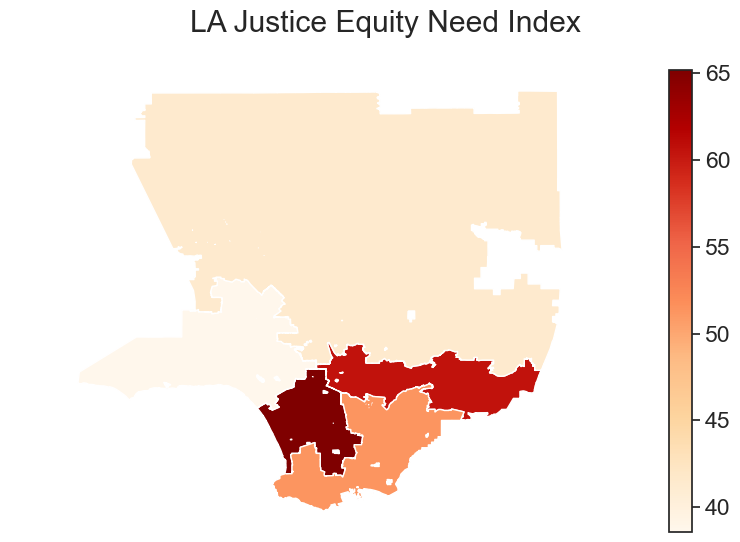

In [57]:
# Plot the data
fig, ax = plt.subplots(figsize=(10, 6))
district_agg.reset_index().plot(column='jenipctl',
                                cmap='OrRd',
                                legend=True,
                                ax=ax)
ax.set_axis_off()
leg = ax.get_legend()
#leg.set_bbox_to_anchor((1.5,1))
plt.suptitle('LA Justice Equity Need Index')
plt.axis('equal')
plt.show() 

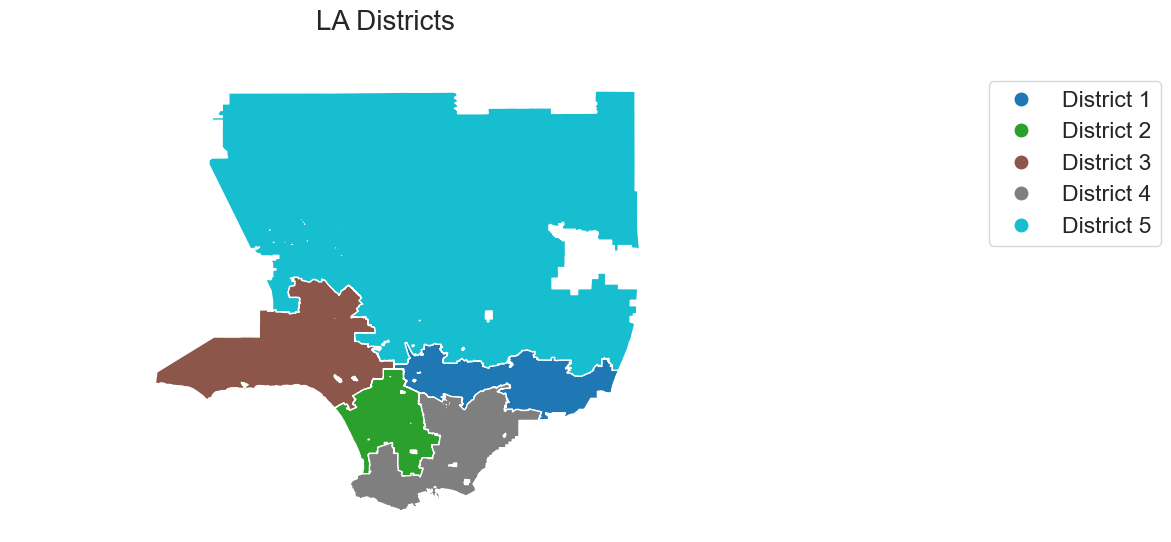

In [55]:
# Plot the data
fig, ax = plt.subplots(figsize=(10, 6))
district_agg.reset_index().plot(column='sup_dist',
                                legend=True,
                                ax=ax)
ax.set_axis_off()
leg = ax.get_legend()
leg.set_bbox_to_anchor((1.5,1))
plt.suptitle('LA Districts', fontsize=20)
plt.axis('equal')
plt.show() 

District 3 and 5 have the lowest JENI numbers which means they are the districts that are in greatest need of public investments in community healing, health, and prevention to help reverse historical injustices.

## 5.2 Spatial Joining
Let's use the same data/Justice_Equity_Need_Index.geojson and do an analysis just for the neighborhoods within the city of Long Beach. You have been provided two additional datasets. First is the boundary of Long Beach: data/LB_City_Boundary.geojson and the second is Long Beach neighborhoods: data/LB_Neighborhoods.geojson

Clip the original data/Justice_Equity_Need_Index.geojson by the city of Long Beach boundary. What should you always first check before working with multiple datasets?
Using the clipped version of the JENI dataset, spatially join the data/LB_Neighborhoods.geojson and your clipped dataset.
Make a map that has different color categories for each Long Beach neighborhood by the jenipctl.
Write a meaningful caption describing the patterns you see in Long Beach neighorboods jenipctl rankings.

In [10]:
fp = "data/Justice_Equity_Need_Index.geojson"
data = gpd.read_file(fp)

In [11]:
data.head()

,OBJECTID,zip,jenicategory,jenipctl,jenirank,riskcategory,riskpctl,driverscategory,driverspctl,systemcategory,systempctl,neighborhood,sup_dist,spa,csa,SHAPE_Length,SHAPE_Area,geometry
0,1,91108,Lowest,0.0,277,Lowest,0.4,Lowest,0.7,Lowest,3.3,San Marino,District 5,SPA 3 - San Gabriel,City of San Marino,0.177419,0.000962,"MULTIPOLYGON (((-118.10864 34.13733, -118.1084..."
1,2,90631,Lowest,0.4,276,Lowest,2.9,Lowest,1.8,Lowest,0.7,La Habra Heights,District 4,SPA 7 - East,City of La Habra Heights,0.234952,0.001614,"MULTIPOLYGON (((-117.94274 33.97488, -117.9427..."
2,3,90274,Lowest,0.7,275,Lowest,3.6,Lowest,0.0,Lowest,7.2,Palos Verdes Estates,District 4,SPA 8 - South Bay,City of Rancho Palos Verdes,0.563332,0.003029,"MULTIPOLYGON (((-118.39057 33.80426, -118.3905..."
3,4,91361,Lowest,1.1,274,Lowest,12.2,Lowest,0.4,Lowest,5.1,Westlake Village,District 3,SPA 2 - San Fernando,City of Westlake Village,0.197748,0.001336,"MULTIPOLYGON (((-118.80028 34.14798, -118.7995..."
4,5,90275,Lowest,1.4,273,Lowest,6.8,Lowest,3.6,Lowest,6.2,Rancho Palos Verdes,District 4,SPA 8 - South Bay,City of Rancho Palos Verdes,0.624171,0.003365,"MULTIPOLYGON (((-118.39313 33.73857, -118.3931..."


In [12]:
lb_boundary = gpd.read_file('data/LB_City_Boundary.geojson')

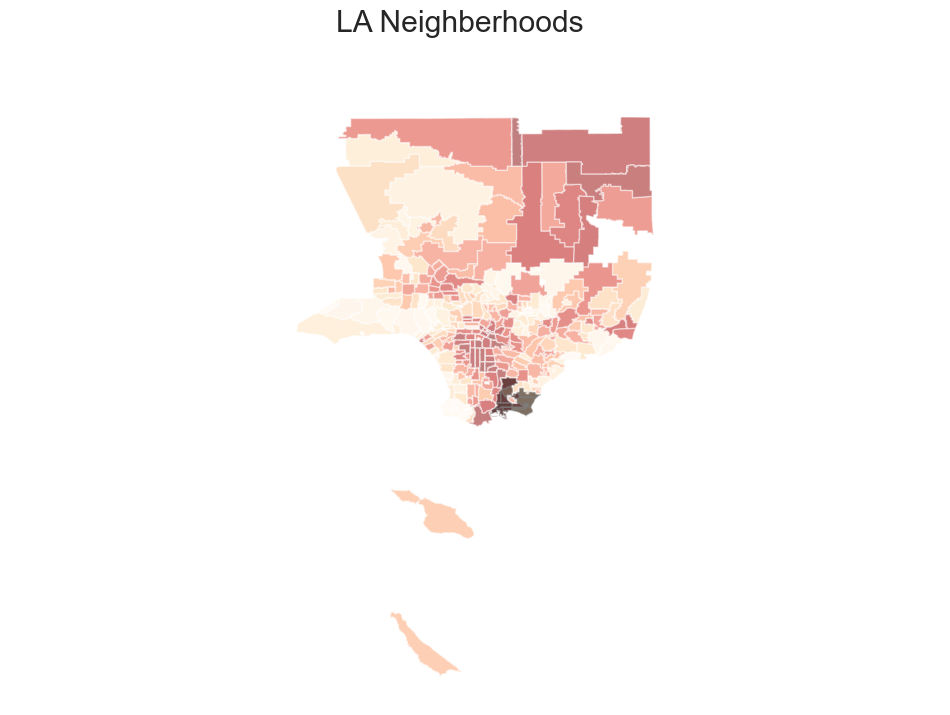

In [58]:
# Plot the data
fig, ax = plt.subplots(figsize=(12, 8))

data.plot(alpha=.5,
        cmap='OrRd',
          ax=ax)

lb_boundary.plot(cmap='cubehelix',
                       ax=ax,
                       alpha=.5)

plt.axis('equal')
plt.suptitle('LA Neighberhoods')
ax.set_axis_off()
plt.show()

In [14]:
# Clip the data using GeoPandas clip
data_clipped = gpd.clip(data, lb_boundary)

In [15]:
lb_neighborhoods = gpd.read_file('data/LB_Neighborhoods.geojson')


In [16]:
lb_joint = gpd.sjoin(lb_neighborhoods, data_clipped,
                         how="inner",
                         op="intersects")
lb_joint

C:\Users\armen\AppData\Roaming\Python\Python310\site-packages\IPython\core\interactiveshell.py:3382: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if await self.run_code(code, result, async_=asy):


,OBJECTID_left,NEIGHBOR_NAME,GlobalID,created_user,created_date,last_edited_user,last_edited_date,SHAPE_Length_left,SHAPE_Area_left,geometry,...,driverscategory,driverspctl,systemcategory,systempctl,neighborhood,sup_dist,spa,csa,SHAPE_Length_right,SHAPE_Area_right
0,1,East Village,{F64F07BE-5FA5-410D-88C1-B66CA53D38DF},NaN,NaT,NaN,NaT,0.033715,0.000069,"MULTIPOLYGON (((-118.18702 33.77534, -118.1863...",...,High,75.300003,Highest,90.900002,Long Beach,District 4,SPA 8 - South Bay,City of Long Beach,0.555848,0.001523
5,6,Willmore,{1ACDFFF5-68A5-4A02-B766-9B9546CA4DFE},NaN,NaT,NaN,NaT,0.037115,0.000075,"MULTIPOLYGON (((-118.20467 33.77650, -118.2046...",...,High,75.300003,Highest,90.900002,Long Beach,District 4,SPA 8 - South Bay,City of Long Beach,0.555848,0.001523
38,39,Saint Mary's,{08EF8122-27A6-493C-AFB6-2CAAFAC9CD01},NaN,NaT,NaN,NaT,0.044193,0.000106,"MULTIPOLYGON (((-118.18939 33.78259, -118.1886...",...,High,75.300003,Highest,90.900002,Long Beach,District 4,SPA 8 - South Bay,City of Long Beach,0.555848,0.001523
39,40,Rose Park,{AEE872EB-E17F-47B4-B670-23F5ED5E08EA},NaN,NaT,NaN,NaT,0.044998,0.000111,"MULTIPOLYGON (((-118.16550 33.77898, -118.1644...",...,High,75.300003,Highest,90.900002,Long Beach,District 4,SPA 8 - South Bay,City of Long Beach,0.555848,0.001523
40,41,West Village,{CE22A43B-FF85-4988-8965-0698278FC88F},NaN,NaT,NaN,NaT,0.035150,0.000067,"MULTIPOLYGON (((-118.20314 33.77559, -118.2023...",...,High,75.300003,Highest,90.900002,Long Beach,District 4,SPA 8 - South Bay,City of Long Beach,0.555848,0.001523
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84,85,Unassigned (LA River),{15C13282-A2C8-40B0-9FAA-F3AA39D04E9E},NaN,NaT,NaN,NaT,0.193786,0.000333,"MULTIPOLYGON (((-118.21569 33.82592, -118.2164...",...,Highest,96.800003,Highest,89.099998,Compton,District 2,SPA 6 - South,City of Compton,0.247334,0.001352
78,79,Ramona Park,{5E8A7031-B353-476C-82CF-02C9FA9B9775},NaN,NaT,NaN,NaT,0.030122,0.000052,"MULTIPOLYGON (((-118.15135 33.86928, -118.1513...",...,High,73.800003,High,76.800003,Bellflower,District 4,SPA 7 - East,City of Bellflower,0.177212,0.001555
79,80,Collins,{A8028431-5136-4500-99E9-9E87038D9AAE},NaN,NaT,NaN,NaT,0.026794,0.000040,"MULTIPOLYGON (((-118.14661 33.86033, -118.1511...",...,High,73.800003,High,76.800003,Bellflower,District 4,SPA 7 - East,City of Bellflower,0.177212,0.001555
85,86,Shoreline,{F70D0A82-326F-4736-BA52-DC952211A11B},NaN,NaT,NaN,NaT,0.071685,0.000135,"MULTIPOLYGON (((-118.20223 33.76531, -118.2020...",...,High,75.300003,Highest,90.900002,Long Beach,District 4,SPA 8 - South Bay,City of Long Beach,0.009660,0.000004


c:\Users\armen\anaconda3\envs\Geosptial_data_analytics\lib\site-packages\geopandas\plotting.py:656: UserWarning: Only specify one of 'column' or 'color'. Using 'color'.
  warnings.warn(


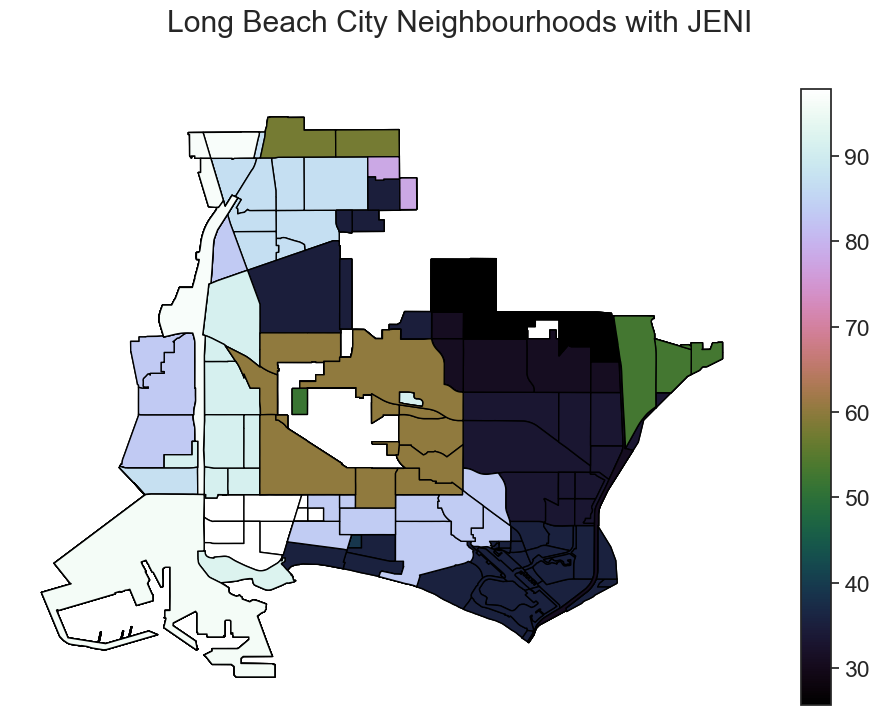

In [60]:
# Plot the data
fig, ax = plt.subplots(figsize=(12, 8))
lb_joint.plot(alpha=1,
                         color="white",
                         legend=True,
                         edgecolor="black",
                         column = 'neighborhood',
                         ax=ax)                         
leg1 = ax.get_legend()
#leg1.set_bbox_to_anchor((1.5,1))
lb_joint.plot(alpha=1,
                         cmap='cubehelix',
                         legend=True,
                         edgecolor="black",
                         column = 'jenipctl',
                         ax=ax)
leg2 = ax.get_legend()
#leg2.set_bbox_to_anchor((1.5,1))

ax.set_axis_off()
plt.suptitle('Long Beach City Neighbourhoods with JENI')
plt.axis('equal')

plt.show()

Southeast areas are facing most injustice.

## 5.3 Calculating Distances
Let's calculate the distance by bird's flight (straight lines) from campus to each zip code. The coordinates of LMU's campus are: 33.9710, -118.4170.

The JENI dataset we have been working with has information already grouped by zip code. Load the JENI dataset and select only the zip and csa columns.
Create the point for LMU's campus assuming the CRS to be epsg:4326. Reproject this point to epsg:3857.
Find the centroids of the zip code and city name dataframe (the subset from the JENI dataframe). Did you receive a warning? What should you do?
Using the following function, calculate the distance from the LMU campus to each zip code.
What is the maximum distance from the LMU campus? Which zip code does this pertain to? What is the average distace to the LMU campus?

In [18]:
def calculate_distance(row, dest_geom, src_col='geometry', target_col='distance'):
    """
    Calculates the distance between Point geometries.

    Parameters
    ----------
    dest_geom : shapely.Point
       A single Shapely Point geometry to which the distances will be calculated to.
    src_col : str
       A name of the column that has the Shapely Point objects from where the distances will be calculated from.
    target_col : str
       A name of the target column where the result will be stored.

    Returns
    -------
    
    Distance in kilometers that will be stored in 'target_col'.
    """
    
    # Calculate the distances
    dist = row[src_col].distance(dest_geom)

    # Convert into kilometers
    dist_km = dist / 1000

    # Assign the distance to the original data
    row[target_col] = dist_km
    return row

In [19]:
data = gpd.read_file(fp)
print(data.crs)

EPSG:4326


In [20]:
data.head()

,OBJECTID,zip,jenicategory,jenipctl,jenirank,riskcategory,riskpctl,driverscategory,driverspctl,systemcategory,systempctl,neighborhood,sup_dist,spa,csa,SHAPE_Length,SHAPE_Area,geometry
0,1,91108,Lowest,0.0,277,Lowest,0.4,Lowest,0.7,Lowest,3.3,San Marino,District 5,SPA 3 - San Gabriel,City of San Marino,0.177419,0.000962,"MULTIPOLYGON (((-118.10864 34.13733, -118.1084..."
1,2,90631,Lowest,0.4,276,Lowest,2.9,Lowest,1.8,Lowest,0.7,La Habra Heights,District 4,SPA 7 - East,City of La Habra Heights,0.234952,0.001614,"MULTIPOLYGON (((-117.94274 33.97488, -117.9427..."
2,3,90274,Lowest,0.7,275,Lowest,3.6,Lowest,0.0,Lowest,7.2,Palos Verdes Estates,District 4,SPA 8 - South Bay,City of Rancho Palos Verdes,0.563332,0.003029,"MULTIPOLYGON (((-118.39057 33.80426, -118.3905..."
3,4,91361,Lowest,1.1,274,Lowest,12.2,Lowest,0.4,Lowest,5.1,Westlake Village,District 3,SPA 2 - San Fernando,City of Westlake Village,0.197748,0.001336,"MULTIPOLYGON (((-118.80028 34.14798, -118.7995..."
4,5,90275,Lowest,1.4,273,Lowest,6.8,Lowest,3.6,Lowest,6.2,Rancho Palos Verdes,District 4,SPA 8 - South Bay,City of Rancho Palos Verdes,0.624171,0.003365,"MULTIPOLYGON (((-118.39313 33.73857, -118.3931..."


In [39]:
from shapely import geometry
import pyproj 
from shapely.ops import transform 
lmu_point = geometry.Point(-118.4170,33.971)

c_crs = pyproj.CRS('EPSG:4326')
t_crs = pyproj.CRS('EPSG:3857')

project = pyproj.Transformer.from_crs(c_crs, t_crs, always_xy = True).transform
lmu_point_reprojected = transform(project, lmu_point)

In [40]:
point_coords = lmu_point.coords
print(lmu_point)
print(lmu_point_reprojected)

POINT (-118.417 33.971)
POINT (-13182120.14126708 4024908.699053638)


In [22]:
data_selected = data[['zip','csa']]
data_selected

,zip,csa
0,91108,City of San Marino
1,90631,City of La Habra Heights
2,90274,City of Rancho Palos Verdes
3,91361,City of Westlake Village
4,90275,City of Rancho Palos Verdes
...,...,...
276,90037,Los Angeles - West Vernon
277,90061,Unincorporated - Athens Village
278,90059,Unincorporated - Willowbrook
279,90014,Los Angeles - Downtown


In [23]:
centroids = data_selected['geometry'].centroid 

KeyError: 'geometry'

It didn't work becasue we didn't add the columns for geodata

In [25]:
data_selected = data
print(data_selected.crs)

EPSG:4326


In [26]:
data_selected = data[['zip','csa','SHAPE_Length','SHAPE_Area','geometry']]

In [27]:
la_borders = data_selected.copy()
la_borders = la_borders.to_crs('EPSG:3857')

In [28]:
la_borders['centroid'] = la_borders.centroid
la_borders

,zip,csa,SHAPE_Length,SHAPE_Area,geometry,centroid
0,91108,City of San Marino,0.177419,0.000962,"MULTIPOLYGON (((-13147794.179 4047256.800, -13...",POINT (-13148349.834 4045245.070)
1,90631,City of La Habra Heights,0.234952,0.001614,"MULTIPOLYGON (((-13129326.139 4025429.029, -13...",POINT (-13130220.945 4023406.404)
2,90274,City of Rancho Palos Verdes,0.563332,0.003029,"MULTIPOLYGON (((-13179177.697 4002548.915, -13...",POINT (-13176716.971 3998944.034)
3,91361,City of Westlake Village,0.197748,0.001336,"MULTIPOLYGON (((-13224787.024 4048688.878, -13...",POINT (-13228375.469 4046330.223)
4,90275,City of Rancho Palos Verdes,0.624171,0.003365,"MULTIPOLYGON (((-13179462.784 3993751.501, -13...",POINT (-13176234.604 3996054.498)
...,...,...,...,...,...,...
276,90037,Los Angeles - West Vernon,0.145093,0.000738,"MULTIPOLYGON (((-13167851.306 4031266.132, -13...",POINT (-13167698.496 4029215.514)
277,90061,Unincorporated - Athens Village,0.155887,0.000694,"MULTIPOLYGON (((-13166123.548 4020646.423, -13...",POINT (-13166201.577 4018109.809)
278,90059,Unincorporated - Willowbrook,0.199342,0.000844,"MULTIPOLYGON (((-13165214.954 4016934.360, -13...",POINT (-13163483.708 4018826.255)
279,90014,Los Angeles - Downtown,0.045286,0.000072,"MULTIPOLYGON (((-13164050.373 4035331.965, -13...",POINT (-13163728.574 4034579.712)


In [35]:
print(lmu_point_reprojected)

POINT (inf inf)


In [41]:
la_borders_aeqd = la_borders.apply(calculate_distance, dest_geom=lmu_point_reprojected, src_col='centroid', target_col='distance', axis=1)
la_borders_aeqd

,zip,csa,SHAPE_Length,SHAPE_Area,geometry,centroid,distance
0,91108,City of San Marino,0.177419,0.000962,"MULTIPOLYGON (((-13147794.179 4047256.800, -13...",POINT (-13148349.8339238 4045245.069634099),39.420827
1,90631,City of La Habra Heights,0.234952,0.001614,"MULTIPOLYGON (((-13129326.139 4025429.029, -13...",POINT (-13130220.94453357 4023406.403868287),51.920935
2,90274,City of Rancho Palos Verdes,0.563332,0.003029,"MULTIPOLYGON (((-13179177.697 4002548.915, -13...",POINT (-13176716.9713547 3998944.034374185),26.520898
3,91361,City of Westlake Village,0.197748,0.001336,"MULTIPOLYGON (((-13224787.024 4048688.878, -13...",POINT (-13228375.46947566 4046330.22251678),50.974867
4,90275,City of Rancho Palos Verdes,0.624171,0.003365,"MULTIPOLYGON (((-13179462.784 3993751.501, -13...",POINT (-13176234.60357408 3996054.49753446),29.448336
...,...,...,...,...,...,...,...
276,90037,Los Angeles - West Vernon,0.145093,0.000738,"MULTIPOLYGON (((-13167851.306 4031266.132, -13...",POINT (-13167698.49636836 4029215.513619322),15.050996
277,90061,Unincorporated - Athens Village,0.155887,0.000694,"MULTIPOLYGON (((-13166123.548 4020646.423, -13...",POINT (-13166201.57709205 4018109.80866925),17.309697
278,90059,Unincorporated - Willowbrook,0.199342,0.000844,"MULTIPOLYGON (((-13165214.954 4016934.360, -13...",POINT (-13163483.7083566 4018826.255470929),19.603896
279,90014,Los Angeles - Downtown,0.045286,0.000072,"MULTIPOLYGON (((-13164050.373 4035331.965, -13...",POINT (-13163728.57422996 4034579.712144999),20.779274


In [50]:
 max_dis_from_LMU = la_borders_aeqd.sort_values(by=['distance'], ascending=False).iloc[0,:]
 max_dis_from_LMU

C:\Users\armen\AppData\Roaming\Python\Python310\site-packages\pandas\core\dtypes\inference.py:387: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  iter(obj)  # Can iterate over it.
C:\Users\armen\AppData\Roaming\Python\Python310\site-packages\pandas\core\dtypes\inference.py:388: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  len(obj)  # Has a length associated with it.
C:\Users\armen\AppData\Roaming\Python\Python310\site-packages\pandas\io\formats\printing.py:117: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  s = iter(seq

zip                                                         93535
csa                                     Unincorporated - Hi Vista
SHAPE_Length                                             1.578336
SHAPE_Area                                               0.065072
geometry        (POLYGON ((-13116452.09704825 4111885.04258227...
centroid             POINT (-13121776.60426097 4124926.678514582)
distance                                               116.811552
Name: 256, dtype: object

The max distance is 116.811552 KM, which is at Hi Vista (zip code: 93535)

In [53]:
avg_distance = la_borders_aeqd["distance"].mean()
avg_distance

35.309524327293175

the average distance is 35.3 KM